# Abstract Factory

Abstract Factory

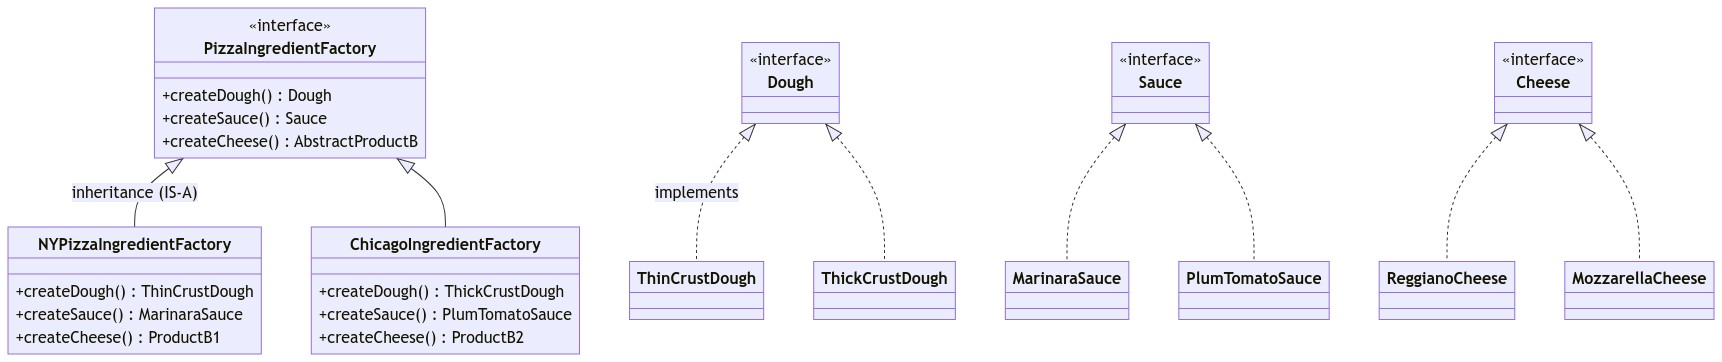

In [ ]:
//#region Code

//#region Abstract Factory

interface PizzaIngredientFactory {
  createDough(): Dough;
  createSauce(): Sauce;
  createCheese(): Cheese;
}

//#endregion

//#region Abstract Products

interface Dough {
  toString(): string;
}

interface Sauce {
  toString(): string;
}

interface Cheese {
  toString(): string;
}

//#endregion

//#region Concrete Factories

class NYPizzaIngredientFactory implements PizzaIngredientFactory {
  createDough(): Dough {
    return new ThinCurstDough();
  }
  createSauce(): Sauce {
    return new MarinaraSauce();
  }
  createCheese(): Cheese {
    return new ReggianoCheese();
  }
}

class ChicagoPizzaIngredientFactory implements PizzaIngredientFactory {
  createDough(): Dough {
    return new ThickCrustDough();
  }
  createSauce(): Sauce {
    return new PlumTomatoSauce();
  }
  createCheese(): Cheese {
    return new MozzarellaCheese();
  }
}

//#endregion

//#region Concrete Products

class ThinCurstDough implements Dough {
  toString(): string {
    return 'Thin crust dough';
  }
}

class ThickCrustDough implements Dough {
  toString(): string {
    return 'Extra thick crust dough';
  }
}

class MarinaraSauce implements Sauce {
  toString(): string {
    return 'Marinara sauce';
  }
}

class PlumTomatoSauce implements Sauce {
  toString(): string {
    return 'Tomato sauce with plum tomatoes';
  }
}

class ReggianoCheese implements Cheese {
  toString(): string {
    return 'Reggiano cheese';
  }
}

class MozzarellaCheese implements Cheese {
  toString(): string {
    return 'Shredded mozzarella cheese';
  }
}

//#endregion

//#region Run

function clientCode(factory: PizzaIngredientFactory) {
  const dough = factory.createDough();
  const sauce = factory.createSauce();
  const cheese = factory.createCheese();

  const results = [
    dough.toString(),
    sauce.toString(),
    cheese.toString(),
  ];

  console.log(results.join('\n'));
}

console.log('Testing NYPizzaIngredientFactory');
clientCode(new NYPizzaIngredientFactory());

console.log('');

console.log('Testing ChicagoPizzaIngredientFactory');
clientCode(new ChicagoPizzaIngredientFactory());

//#endregion

//#endregion


Testing NYPizzaIngredientFactory
Thin crust dough
Marinara sauce
Reggiano cheese

Testing ChicagoPizzaIngredientFactory
Extra thick crust dough
Tomato sauce with plum tomatoes
Shredded mozzarella cheese


# Refactoring Guru Abstract Factory in TypeScript

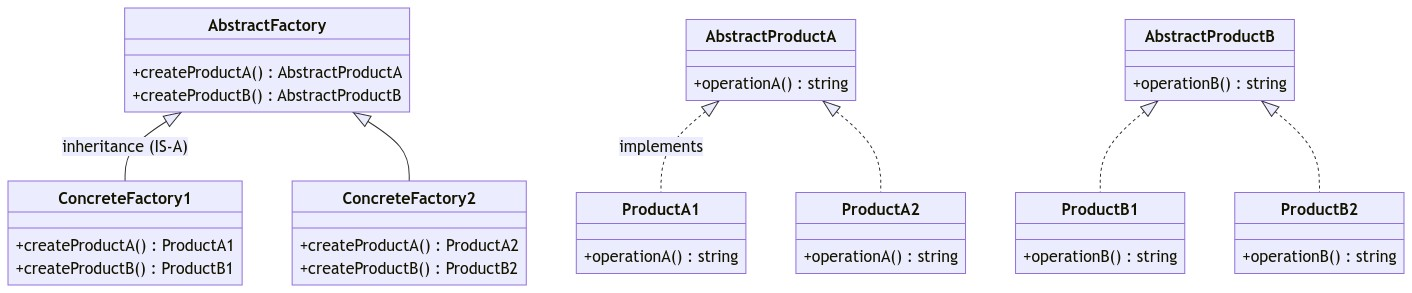


In [ ]:
//#region Code

/**
 * The Abstract Factory interface declares a set of methods that return
 * different abstract products. These products are called a family and are
 * related by a high-level theme or concept. Products of one family are usually
 * able to collaborate among themselves. A family of products may have several
 * variants, but the products of one variant are incompatible with products of
 * another.
 */
interface AbstractFactory {
  createProductA(): AbstractProductA;

  createProductB(): AbstractProductB;
}

/**
* Concrete Factories produce a family of products that belong to a single
* variant. The factory guarantees that resulting products are compatible. Note
* that signatures of the Concrete Factory's methods return an abstract product,
* while inside the method a concrete product is instantiated.
*/
class ConcreteFactory1 implements AbstractFactory {
  public createProductA(): AbstractProductA {
      return new ConcreteProductA1();
  }

  public createProductB(): AbstractProductB {
      return new ConcreteProductB1();
  }
}

/**
* Each Concrete Factory has a corresponding product variant.
*/
class ConcreteFactory2 implements AbstractFactory {
  public createProductA(): AbstractProductA {
      return new ConcreteProductA2();
  }

  public createProductB(): AbstractProductB {
      return new ConcreteProductB2();
  }
}

/**
* Each distinct product of a product family should have a base interface. All
* variants of the product must implement this interface.
*/
interface AbstractProductA {
  usefulFunctionA(): string;
}

/**
* These Concrete Products are created by corresponding Concrete Factories.
*/
class ConcreteProductA1 implements AbstractProductA {
  public usefulFunctionA(): string {
      return 'The result of the product A1.';
  }
}

class ConcreteProductA2 implements AbstractProductA {
  public usefulFunctionA(): string {
      return 'The result of the product A2.';
  }
}

/**
* Here's the the base interface of another product. All products can interact
* with each other, but proper interaction is possible only between products of
* the same concrete variant.
*/
interface AbstractProductB {
  /**
   * Product B is able to do its own thing...
   */
  usefulFunctionB(): string;

  /**
   * ...but it also can collaborate with the ProductA.
   *
   * The Abstract Factory makes sure that all products it creates are of the
   * same variant and thus, compatible.
   */
  anotherUsefulFunctionB(collaborator: AbstractProductA): string;
}

/**
* These Concrete Products are created by corresponding Concrete Factories.
*/
class ConcreteProductB1 implements AbstractProductB {

  public usefulFunctionB(): string {
      return 'The result of the product B1.';
  }

  /**
   * The variant, Product B1, is only able to work correctly with the variant,
   * Product A1. Nevertheless, it accepts any instance of AbstractProductA as
   * an argument.
   */
  public anotherUsefulFunctionB(collaborator: AbstractProductA): string {
      const result = collaborator.usefulFunctionA();
      return `The result of the B1 collaborating with the (${result})`;
  }
}

class ConcreteProductB2 implements AbstractProductB {

  public usefulFunctionB(): string {
      return 'The result of the product B2.';
  }

  /**
   * The variant, Product B2, is only able to work correctly with the variant,
   * Product A2. Nevertheless, it accepts any instance of AbstractProductA as
   * an argument.
   */
  public anotherUsefulFunctionB(collaborator: AbstractProductA): string {
      const result = collaborator.usefulFunctionA();
      return `The result of the B2 collaborating with the (${result})`;
  }
}

/**
* The client code works with factories and products only through abstract
* types: AbstractFactory and AbstractProduct. This lets you pass any factory or
* product subclass to the client code without breaking it.
*/
function clientCode(factory: AbstractFactory) {
  const productA = factory.createProductA();
  const productB = factory.createProductB();

  console.log(productB.usefulFunctionB());
  console.log(productB.anotherUsefulFunctionB(productA));
}

/**
* The client code can work with any concrete factory class.
*/
console.log('Client: Testing client code with the first factory type...');
clientCode(new ConcreteFactory1());

console.log('');

console.log('Client: Testing the same client code with the second factory type...');
clientCode(new ConcreteFactory2());

//#endregion


Client: Testing client code with the first factory type...
The result of the product B1.
The result of the B1 collaborating with the (The result of the product A1.)

Client: Testing the same client code with the second factory type...
The result of the product B2.
The result of the B2 collaborating with the (The result of the product A2.)
